Training Set Metrics:
  MSE: 0.22908407827131905
  RMSE: 0.4786272853393536
  MAPE: 2290840805.747384
  R2: 0.07408803894053784

Test Set Metrics:
  MSE: 0.2285984021852601
  RMSE: 0.47811965258213357
  MAPE: 2282995099.538375
  R2: 0.07063949398619751

Training Set Metrics for 8 Featrues
  MSE: 0.21164982757276785
  RMSE: 0.46005415721713444
  MAPE: 2129058807.0637147
  R2: 0.14455378835320176

Test Set Metrics for 8 Featrues
  MSE: 0.20329144505854896
  RMSE: 0.4508785258343415
  MAPE: 1949051260.6078281
  R2: 0.1735242309577597

Cluster labels:
[1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 

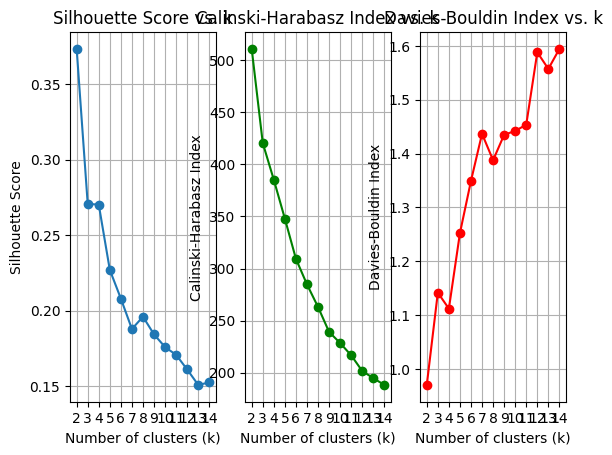

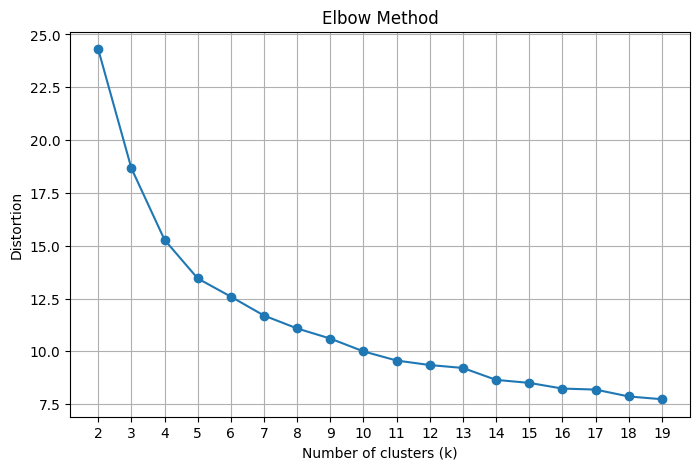

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def loadData(path):
  df = pd.read_csv(path)
  return df

def train_test_Datasplit(df):
  features = df[['fmri_feature_18']]
  label = df[['label']]

  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=42)
  return X_train, X_test, y_train, y_test

def A1(X_train, y_train):
  reg = LinearRegression().fit(X_train,y_train)
  y_train_pred = reg.predict(X_train)
  return reg, y_train_pred

def test_performance_metrics(y_test, y_test_pred):
  mse_test = mean_squared_error(y_test,y_test_pred)
  rmse_test = np.sqrt(mse_test)
  mape_test = np.mean(np.abs((y_test - y_test_pred) / (y_test + 1e-8))) * 100
  r2_test = r2_score(y_test, y_test_pred)

  return mse_test,rmse_test,mape_test,r2_test

def train_perfomance_metrics(y_train, y_train_pred):
  mse_train = mean_squared_error(y_train, y_train_pred)
  rmse_train = np.sqrt(mse_train)
  mape_train = np.mean(np.abs((y_train - y_train_pred) / (y_train + 1e-8))) * 100
  r2_train = r2_score(y_train, y_train_pred)

  return mse_train,rmse_train,mape_train,r2_train

# A3
def A3(df):
  features = df[['fmri_feature_18','fmri_feature_19','fmri_feature_20','fmri_feature_21','fmri_feature_22','fmri_feature_23','fmri_feature_24','fmri_feature_25']]
  label = df[['label']]

  X_train1, X_test1, y_train1, y_test1 = train_test_split(features, label, test_size=0.25, random_state=42)
  reg1 = LinearRegression().fit(X_train1,y_train1)
  y_train_pred1 = reg1.predict(X_train1)
  y_test_pred1 = reg1.predict(X_test1)

  mse_test1 = mean_squared_error(y_test1,y_test_pred1)
  rmse_test1 = np.sqrt(mse_test1)
  mape_test1 = np.mean(np.abs((y_test1 - y_test_pred1) / (y_test1 + 1e-8))) * 100
  r2_test1 = r2_score(y_test1, y_test_pred1)

  mse_train1 = mean_squared_error(y_train1, y_train_pred1)
  rmse_train1 = np.sqrt(mse_train1)
  mape_train1 = np.mean(np.abs((y_train1 - y_train_pred1) / (y_train1 + 1e-8))) * 100
  r2_train1 = r2_score(y_train1, y_train_pred1)

  print("\nTraining Set Metrics for 8 Featrues")
  print(f"  MSE: {mse_train1}")
  print(f"  RMSE: {rmse_train1}")
  print(f"  MAPE: {mape_train1}")
  print(f"  R2: {r2_train1}")

  print("\nTest Set Metrics for 8 Featrues")
  print(f"  MSE: {mse_test1}")
  print(f"  RMSE: {rmse_test1}")
  print(f"  MAPE: {mape_test1}")
  print(f"  R2: {r2_test1}")

  return X_train1, X_test1, y_train1, y_test1

# A4
def A4(X_train):
  kmeans = KMeans(n_clusters=2, random_state=0,n_init="auto").fit(X_train)
  labels = kmeans.labels_
  centeroids = kmeans.cluster_centers_

  print("\nCluster labels:")
  print(labels)
  print("\nCluster centeroids:")
  print(centeroids)

# A5
def A5(X_train):
  kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
  ss = silhouette_score(X_train, kmeans.labels_)
  chs = calinski_harabasz_score(X_train, kmeans.labels_)
  dbs = davies_bouldin_score(X_train, kmeans.labels_)

  print("\nSilhouette Score:", ss)
  print("Calinski-Harabasz Index:", chs)
  print("Davies-Bouldin Index:", dbs)

# A6
def A6(X_train):
  silhouette_scores = []
  calinski_harabasz_scores = []
  davies_bouldin_scores = []

  for k in range(2,15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    ss = silhouette_score(X_train, kmeans.labels_)
    chs = calinski_harabasz_score(X_train, kmeans.labels_)
    dbs = davies_bouldin_score(X_train, kmeans.labels_)

    silhouette_scores.append(ss)
    calinski_harabasz_scores.append(chs)
    davies_bouldin_scores.append(dbs)

  k_values = range(2,15)
  # Plot Silhouette Score
  plt.subplot(1, 3, 1)
  plt.plot(k_values, silhouette_scores, marker='o')
  plt.title('Silhouette Score vs. k')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.xticks(k_values)
  plt.grid(True)

  # Plot Calinski-Harabasz Index
  plt.subplot(1, 3, 2)
  plt.plot(k_values, calinski_harabasz_scores, marker='o', color='green')
  plt.title('Calinski-Harabasz Index vs. k')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Calinski-Harabasz Index')
  plt.xticks(k_values)
  plt.grid(True)

  # Plot Davies-Bouldin Index
  plt.subplot(1, 3, 3)
  plt.plot(k_values, davies_bouldin_scores, marker='o', color='red')
  plt.title('Davies-Bouldin Index vs. k')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Davies-Bouldin Index')
  plt.xticks(k_values)
  plt.grid(True)


def A7(X_train):
  distorsions = []
  for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(X_train)
    distorsions.append(kmeans.inertia_)

  k_values = range(2,20)
  plt.figure(figsize=(8, 5)) # Create a new figure
  plt.plot(k_values, distorsions, marker='o') # Use k_values for x-axis
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Distortion')
  plt.xticks(k_values)
  plt.grid(True)
  plt.show()

path = '/content/fmri_gap_cnn_extracted_features (1).csv'
df = loadData(path)
X_train, X_test, y_train, y_test = train_test_Datasplit(df)
reg, y_train_pred = A1(X_train, y_train)

#A1: Generate predictions for the test set
y_test_pred = reg.predict(X_test)

#A2: Calculate and display performance metrics for training set
mse_train, rmse_train, mape_train, r2_train = train_perfomance_metrics(y_train, y_train_pred)
print("Training Set Metrics:")
print(f"  MSE: {mse_train}")
print(f"  RMSE: {rmse_train}")
print(f"  MAPE: {mape_train}")
print(f"  R2: {r2_train}")

#A2: Calculate and display performance metrics for test set
mse_test, rmse_test, mape_test, r2_test = test_performance_metrics(y_test, y_test_pred)
print("\nTest Set Metrics:")
print(f"  MSE: {mse_test}")
print(f"  RMSE: {rmse_test}")
print(f"  MAPE: {mape_test}")
print(f"  R2: {r2_test}")

X_train1, X_test1, y_train1, y_test1 = A3(df)
A4(X_train)
A5(X_train)
A6(X_train1)
A7(X_train1)